In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from perceptron import Perceptron

In [62]:
data = pd.read_csv("weatherHistory.csv")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [65]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], errors='coerce') 
data['Formatted Date'].dtype

datetime64[ns, UTC+02:00]

In [66]:
data['year'] = data['Formatted Date'].dt.year
data['month'] = data['Formatted Date'].dt.month
data['day'] = data['Formatted Date'].dt.day
data['hour'] = data['Formatted Date'].dt.hour
data['day_of_year'] = data['Formatted Date'].dt.dayofyear

data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,year,month,day,hour,day_of_year
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006.0,4.0,1.0,0.0,91.0
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006.0,4.0,1.0,1.0,91.0
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006.0,4.0,1.0,2.0,91.0
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006.0,4.0,1.0,3.0,91.0
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006.0,4.0,1.0,4.0,91.0


In [67]:
df =  data[["year","month","day","hour","Temperature (C)","day_of_year"]]
df.head(2)

,year,month,day,hour,Temperature (C),day_of_year
0,2006.0,4.0,1.0,0.0,9.472222,91.0
1,2006.0,4.0,1.0,1.0,9.355556,91.0


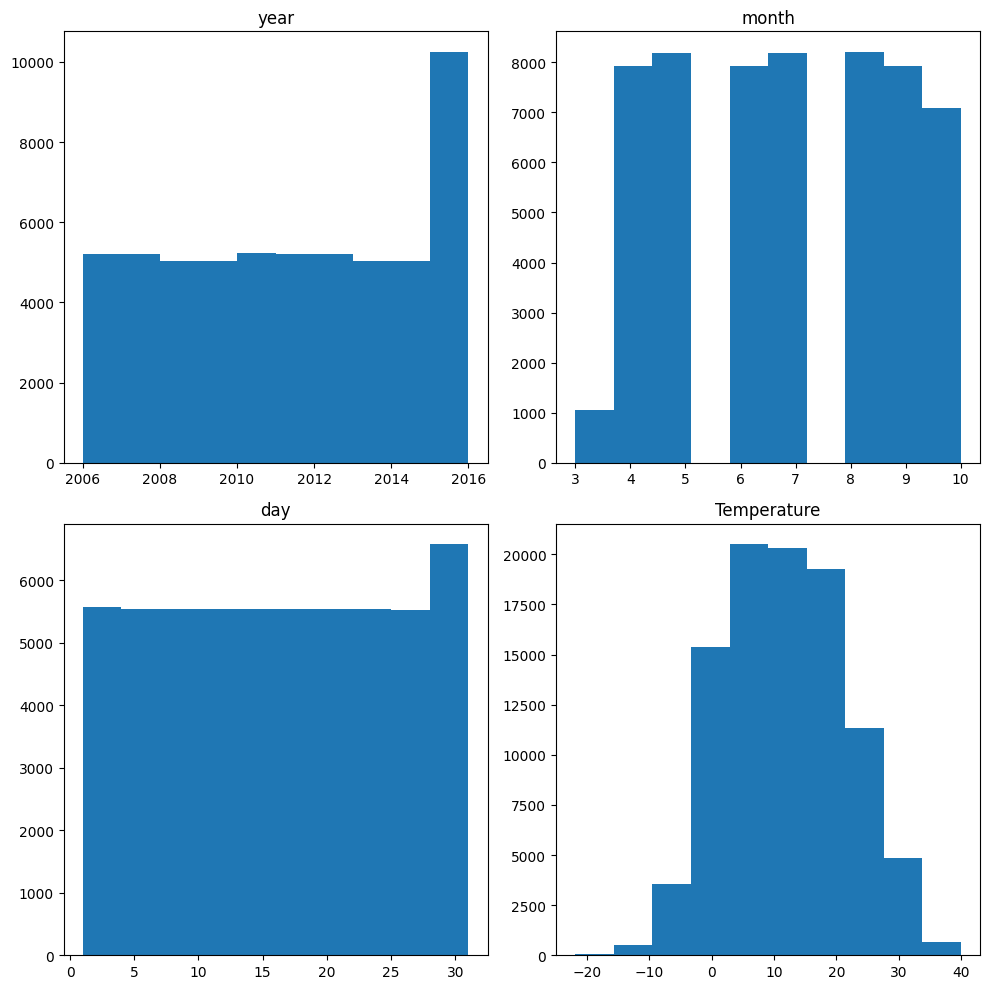

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))  


axes[0, 0].hist(df["year"])
axes[0, 0].set_title('year')

axes[0, 1].hist(df["month"])
axes[0, 1].set_title('month')

axes[1, 0].hist(df["day"])
axes[1, 0].set_title('day')

axes[1, 1].hist(df["Temperature (C)"])
axes[1, 1].set_title('Temperature')

plt.tight_layout() 
plt.show()


In [69]:
df.to_csv("processed_data.csv")

In [70]:
daily_avg_temp = df.groupby("day_of_year")["Temperature (C)"].mean().reset_index()

In [71]:
X = daily_avg_temp[["day_of_year"]].values
Y = daily_avg_temp[["Temperature (C)"]].values

In [72]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(176, 1)
(45, 1)
(176, 1)
(45, 1)


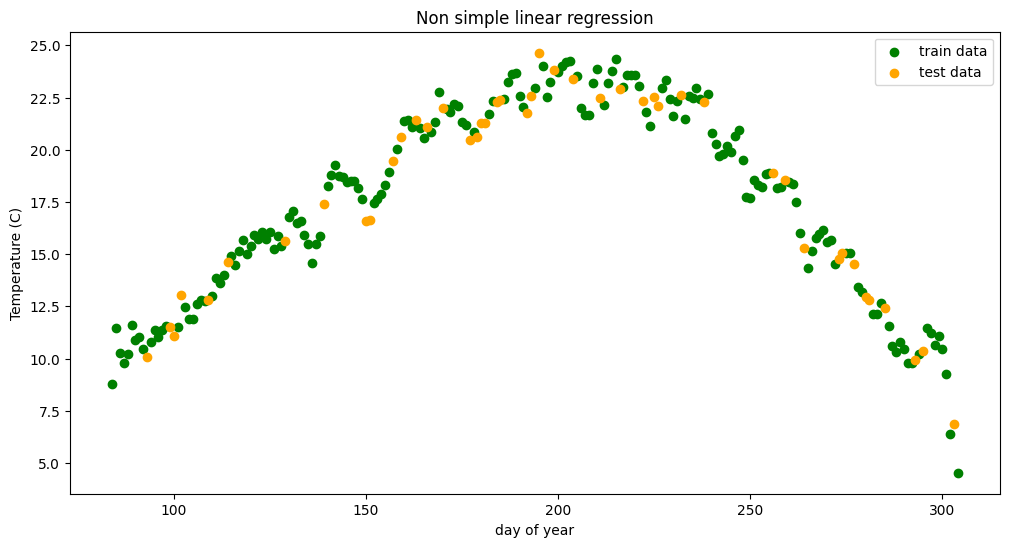

In [73]:
plt.figure(figsize=(12,6))
plt.scatter(X_train,Y_train,color="green")
plt.scatter(X_test,Y_test,color="orange")
plt.title("Non simple linear regression")
plt.xlabel("day of year")
plt.ylabel("Temperature (C)")
plt.legend(["train data","test data"])
plt.show()

In [90]:
model = Perceptron(learning_rate=0.00001,input_length=1)
model.fit(X_train,Y_train,X_test,Y_test,256,activation_function="relu")
Y_pred = model.predict(X_test,activation_function="relu")

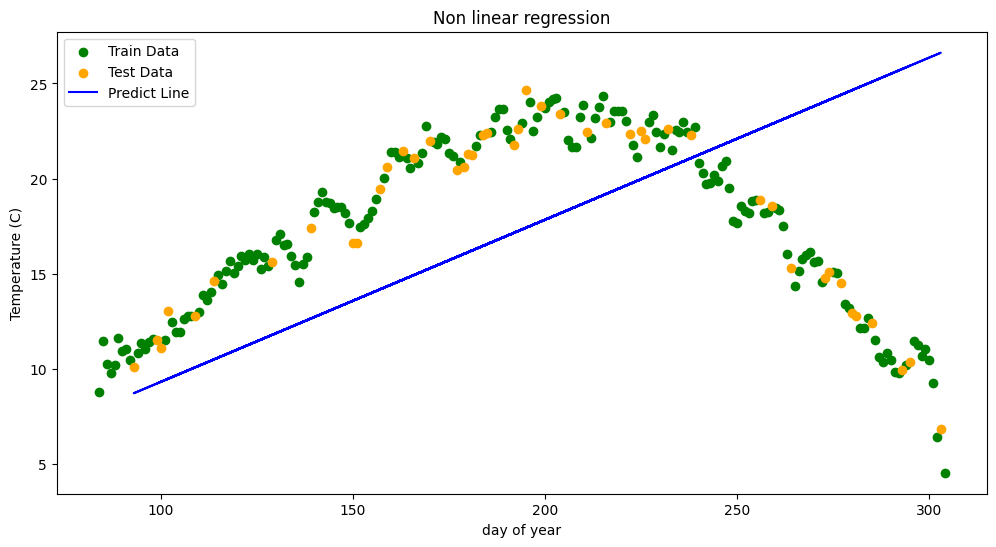

In [91]:
plt.figure(figsize=(12,6))
plt.scatter(X_train,Y_train,color="green",label="Train Data")
plt.scatter(X_test,Y_test,color="orange",label="Test Data")
plt.plot(X_test, Y_pred, color="blue", label="Predict Line")
plt.title("Non linear regression")
plt.xlabel("day of year")
plt.ylabel("Temperature (C)")
plt.legend()
plt.show()